In [15]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy

import matplotlib.pyplot as plt

In [2]:
import sys

sys.path.append("../src")

In [3]:
from core import SITE_NAMES
from calls import plot_call_features, compute_features

In [4]:
site_key = 'Central'
location_call_signals = np.load(f'../data/detected_calls/{site_key}/2022_{site_key}_call_signals.npy', allow_pickle=True)

location_calls_sampled = pd.read_csv(f'../data/detected_calls/{site_key}/2022_{site_key}.csv', index_col=0, low_memory=False)
location_calls_sampled['index'] = location_calls_sampled.index

snr_thresh = 4
good_snr_location_calls_sampled = location_calls_sampled.loc[location_calls_sampled['SNR']>=snr_thresh].copy()
good_snr_location_calls_sampled.set_index(keys=np.arange(len(good_snr_location_calls_sampled)), inplace=True)

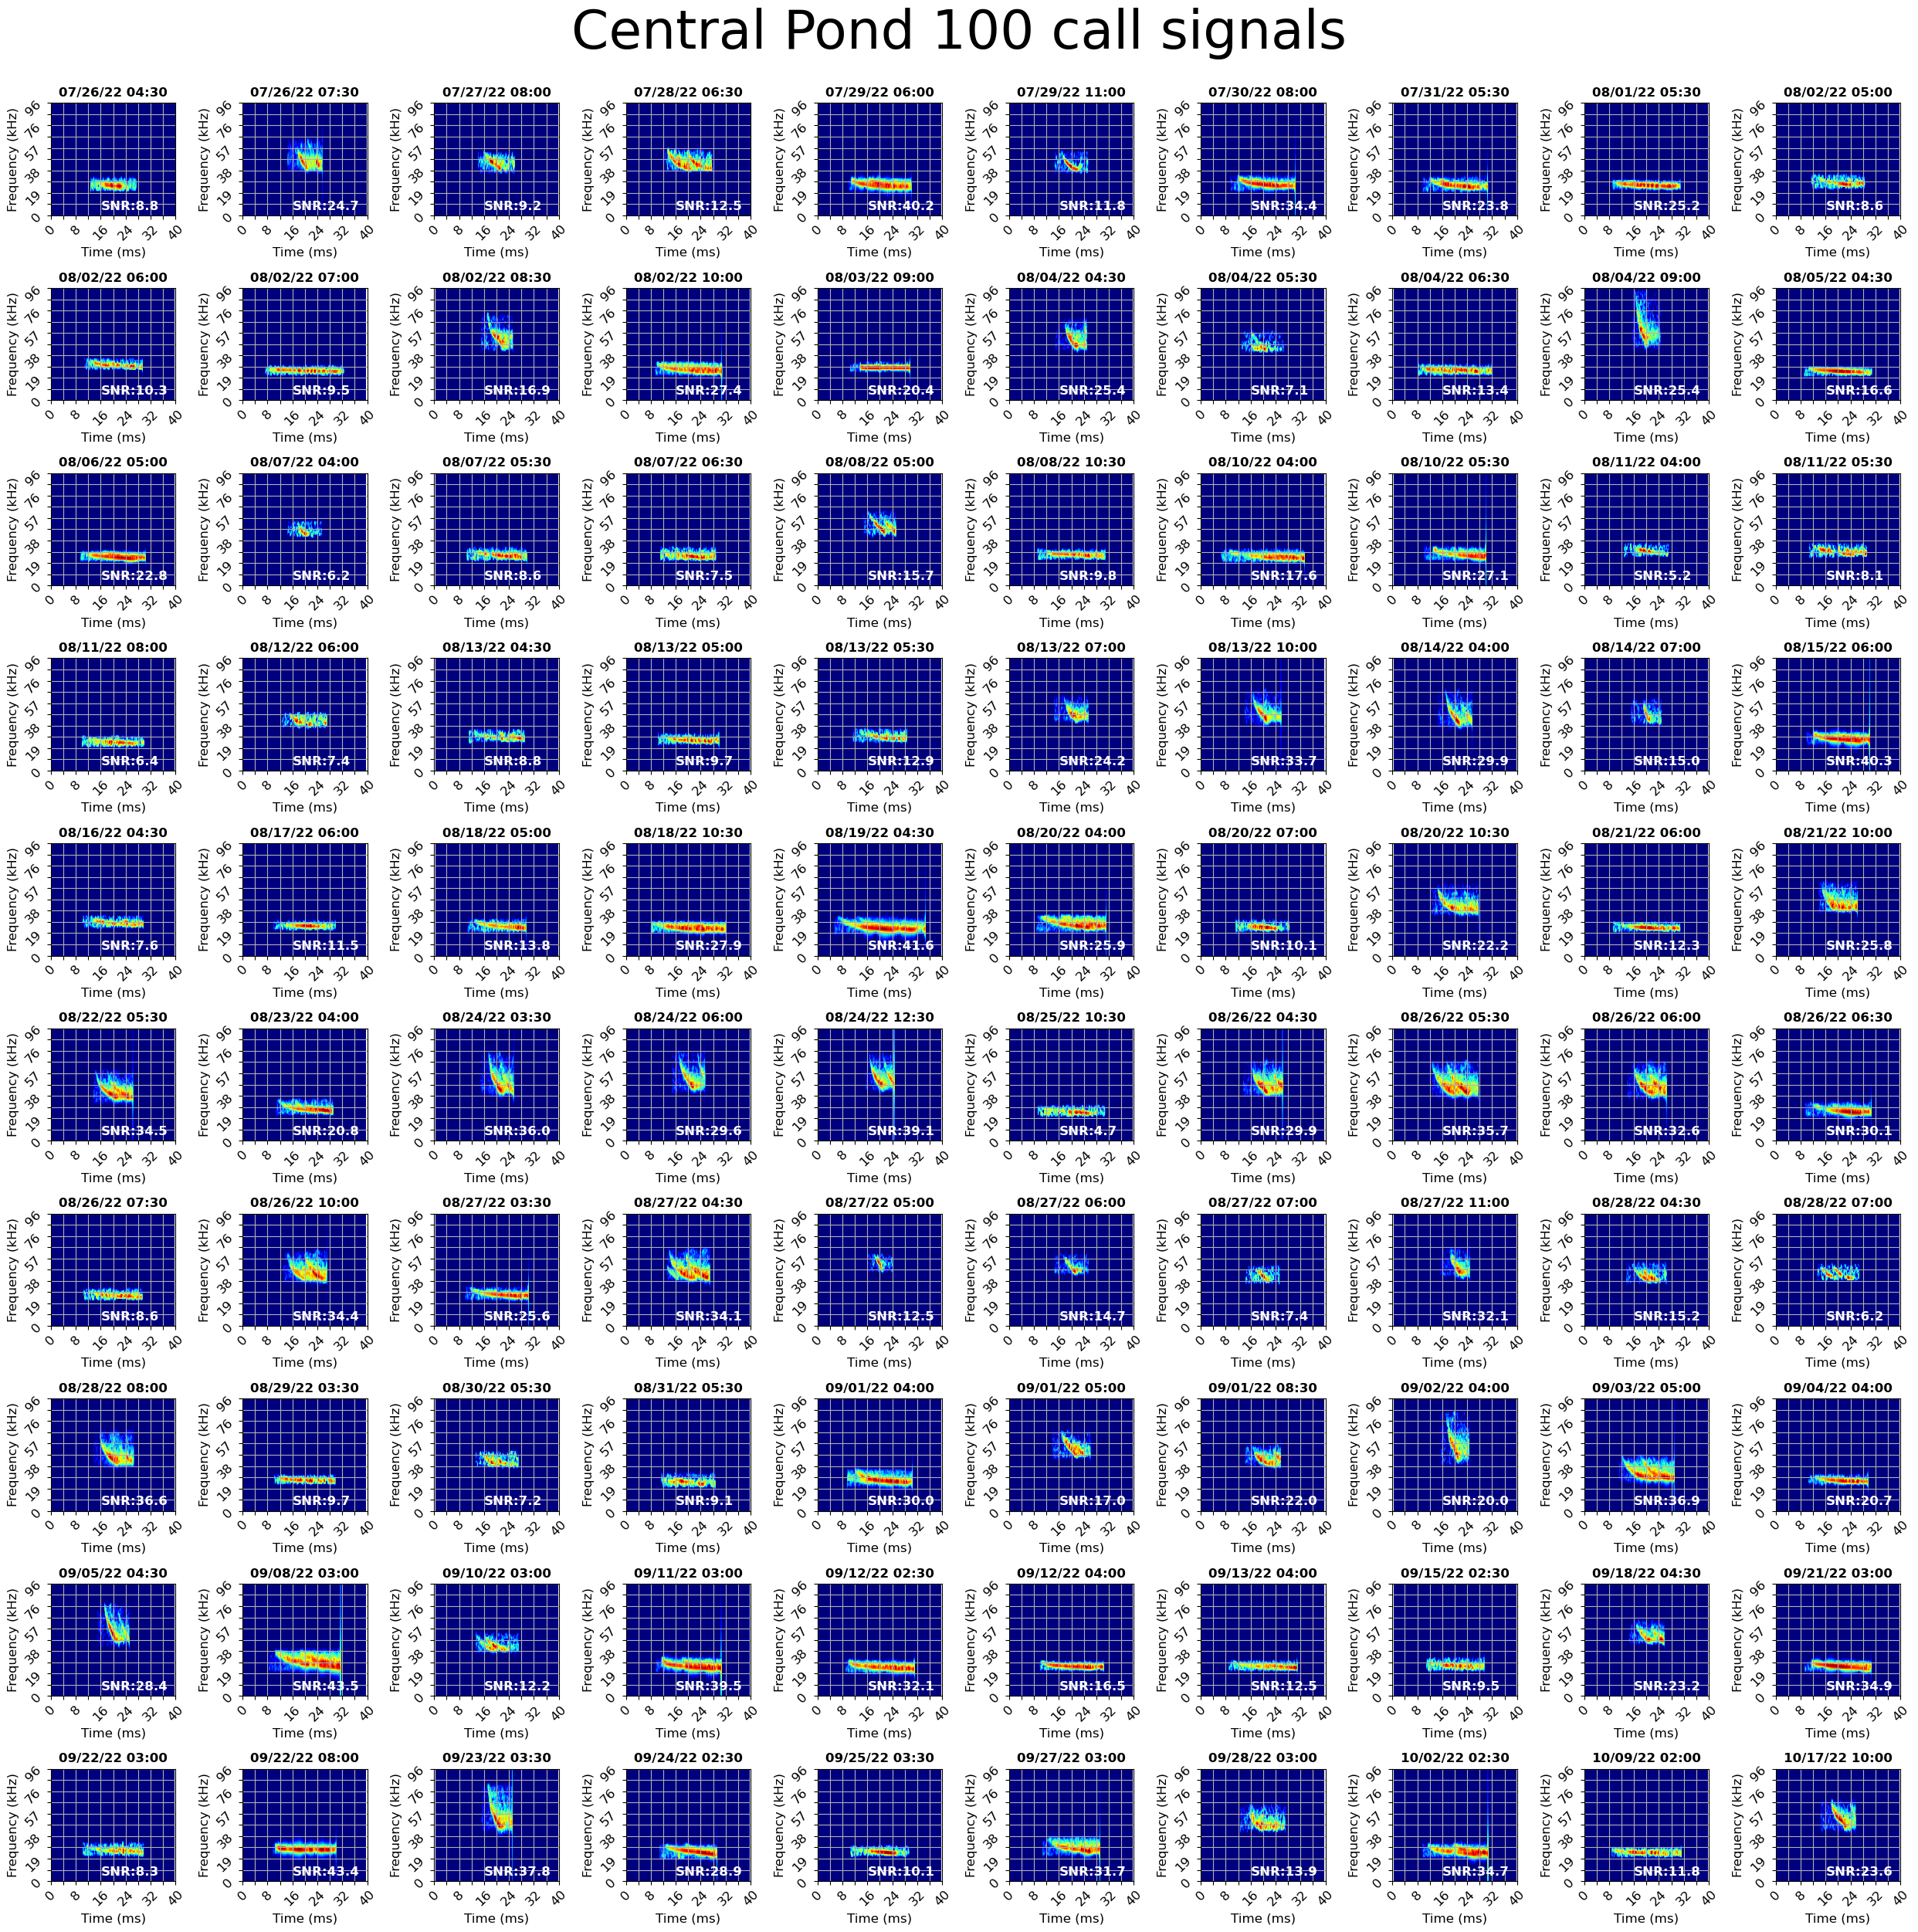

In [5]:
plot_call_features.plot_hundred_calls(good_snr_location_calls_sampled, location_call_signals, site_key)

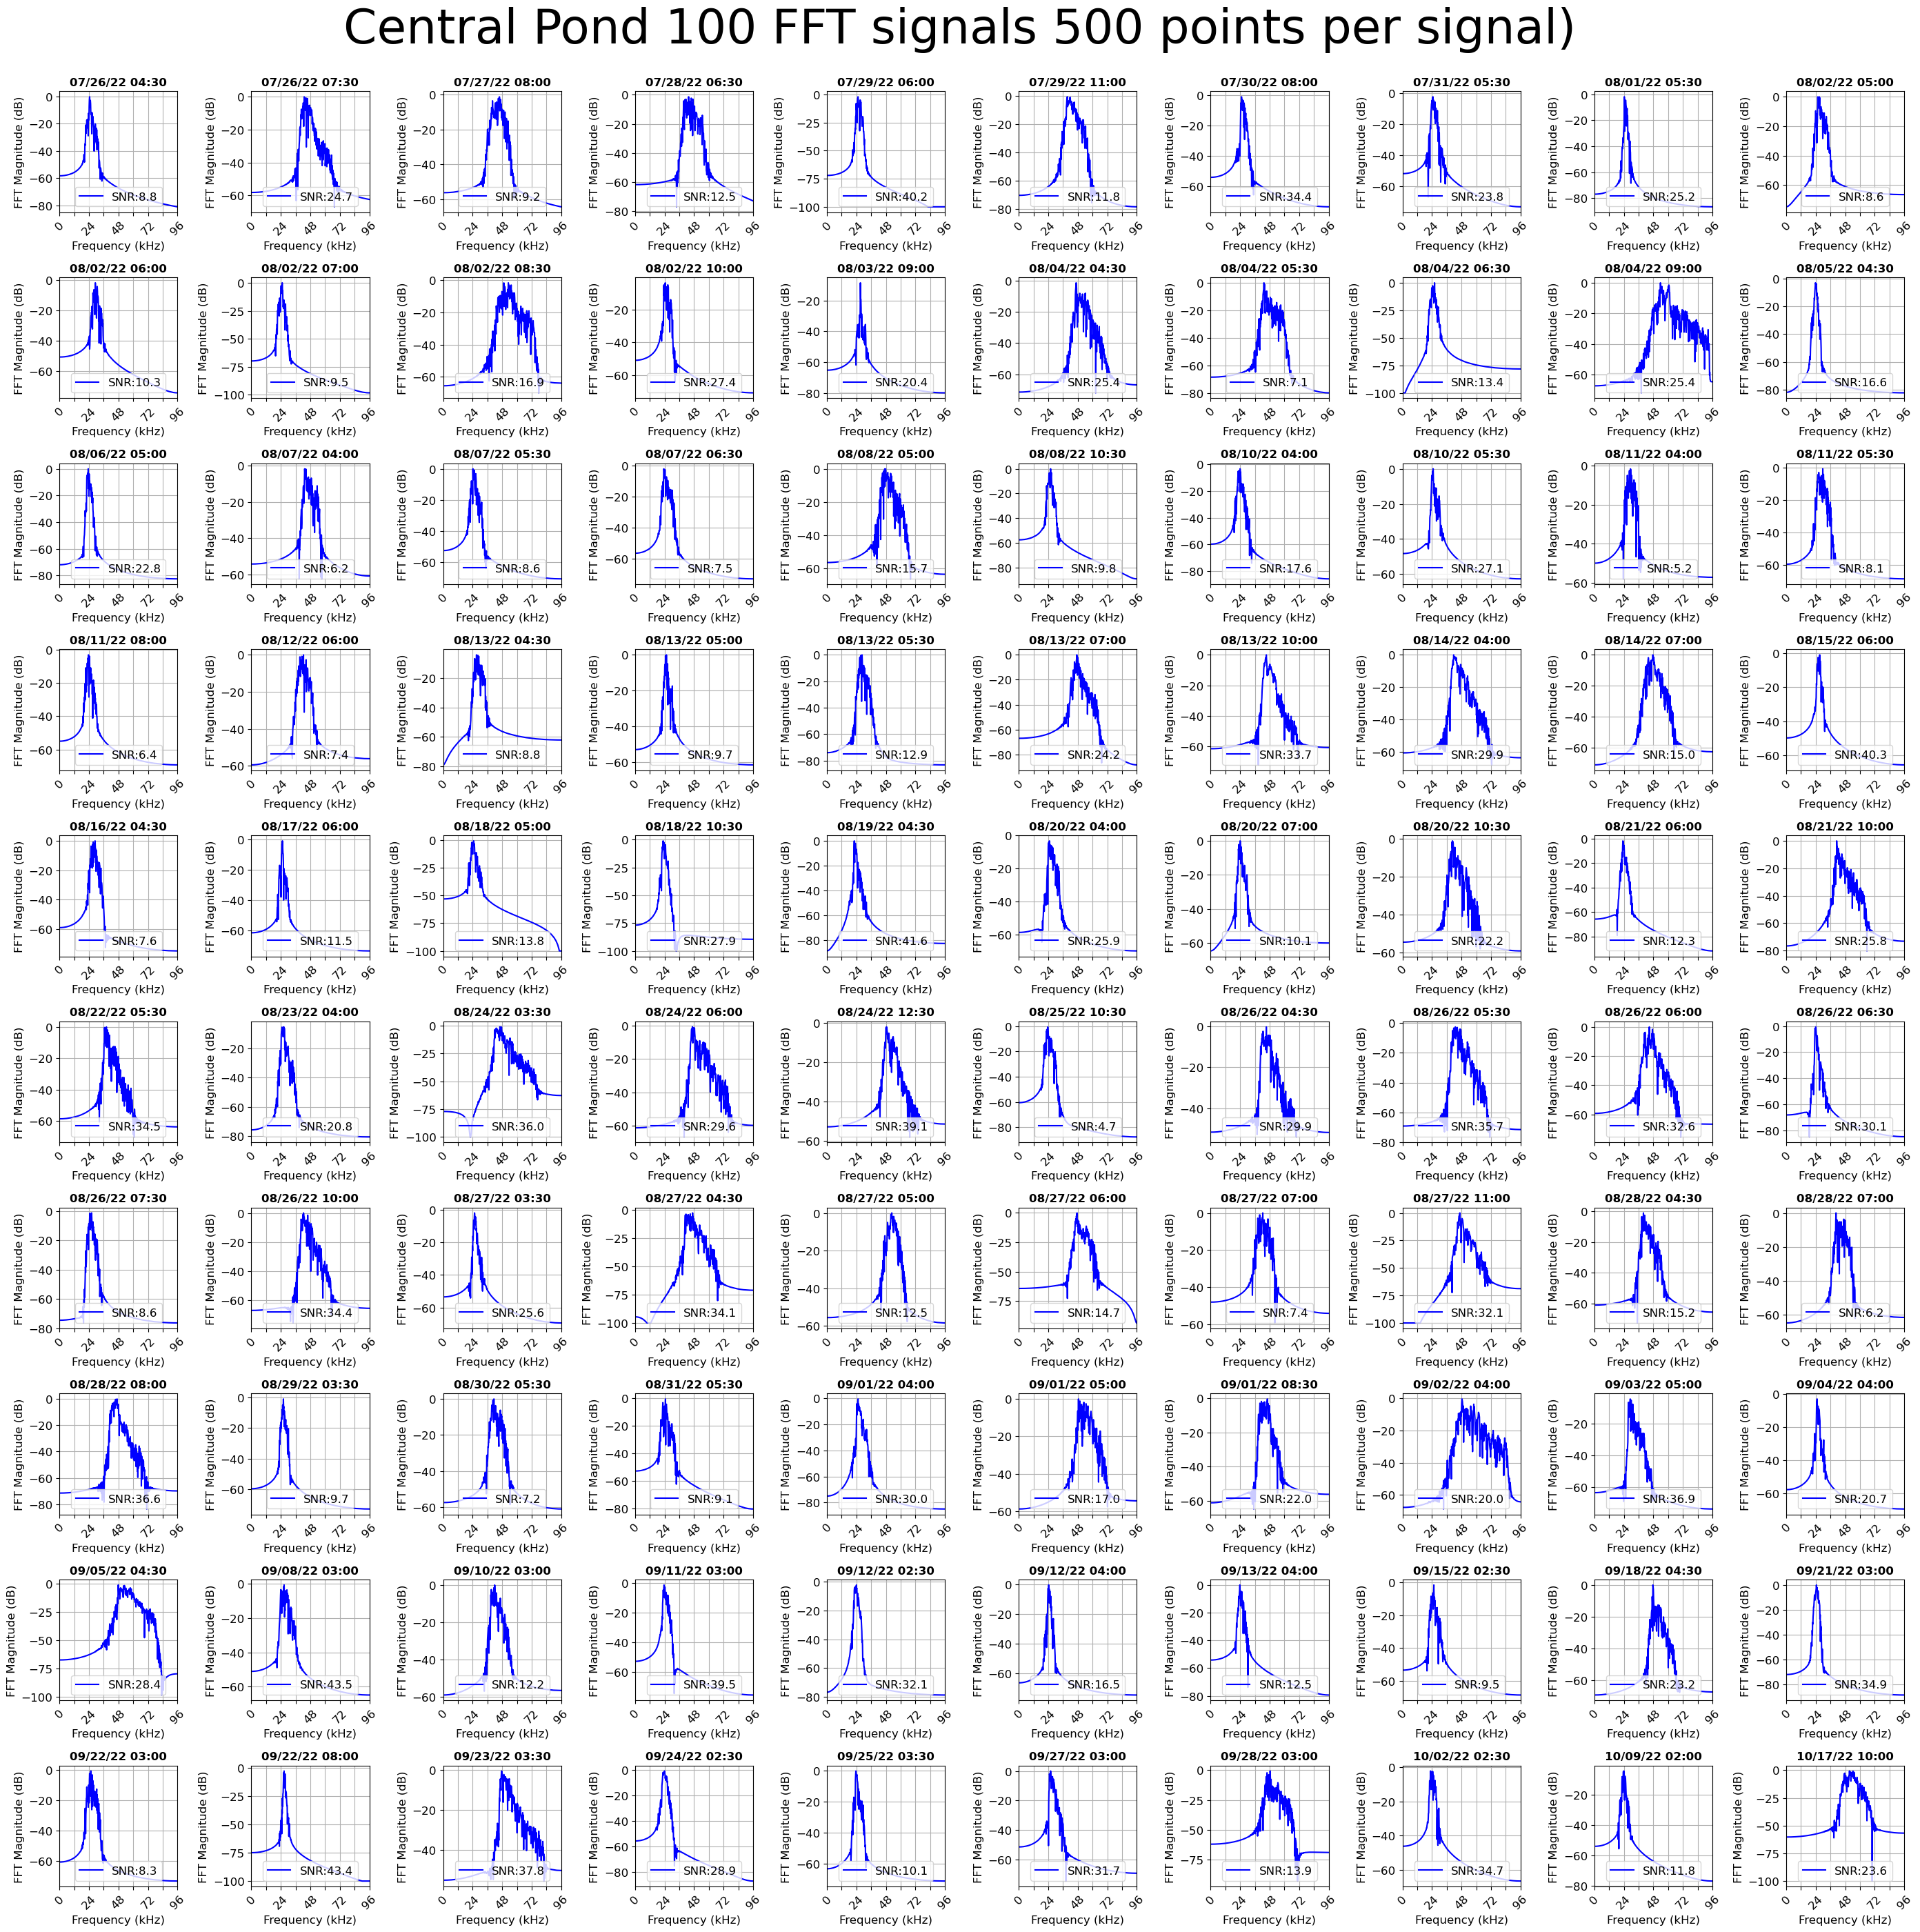

In [6]:
plot_call_features.plot_hundred_ffts(good_snr_location_calls_sampled, location_call_signals, site_key)

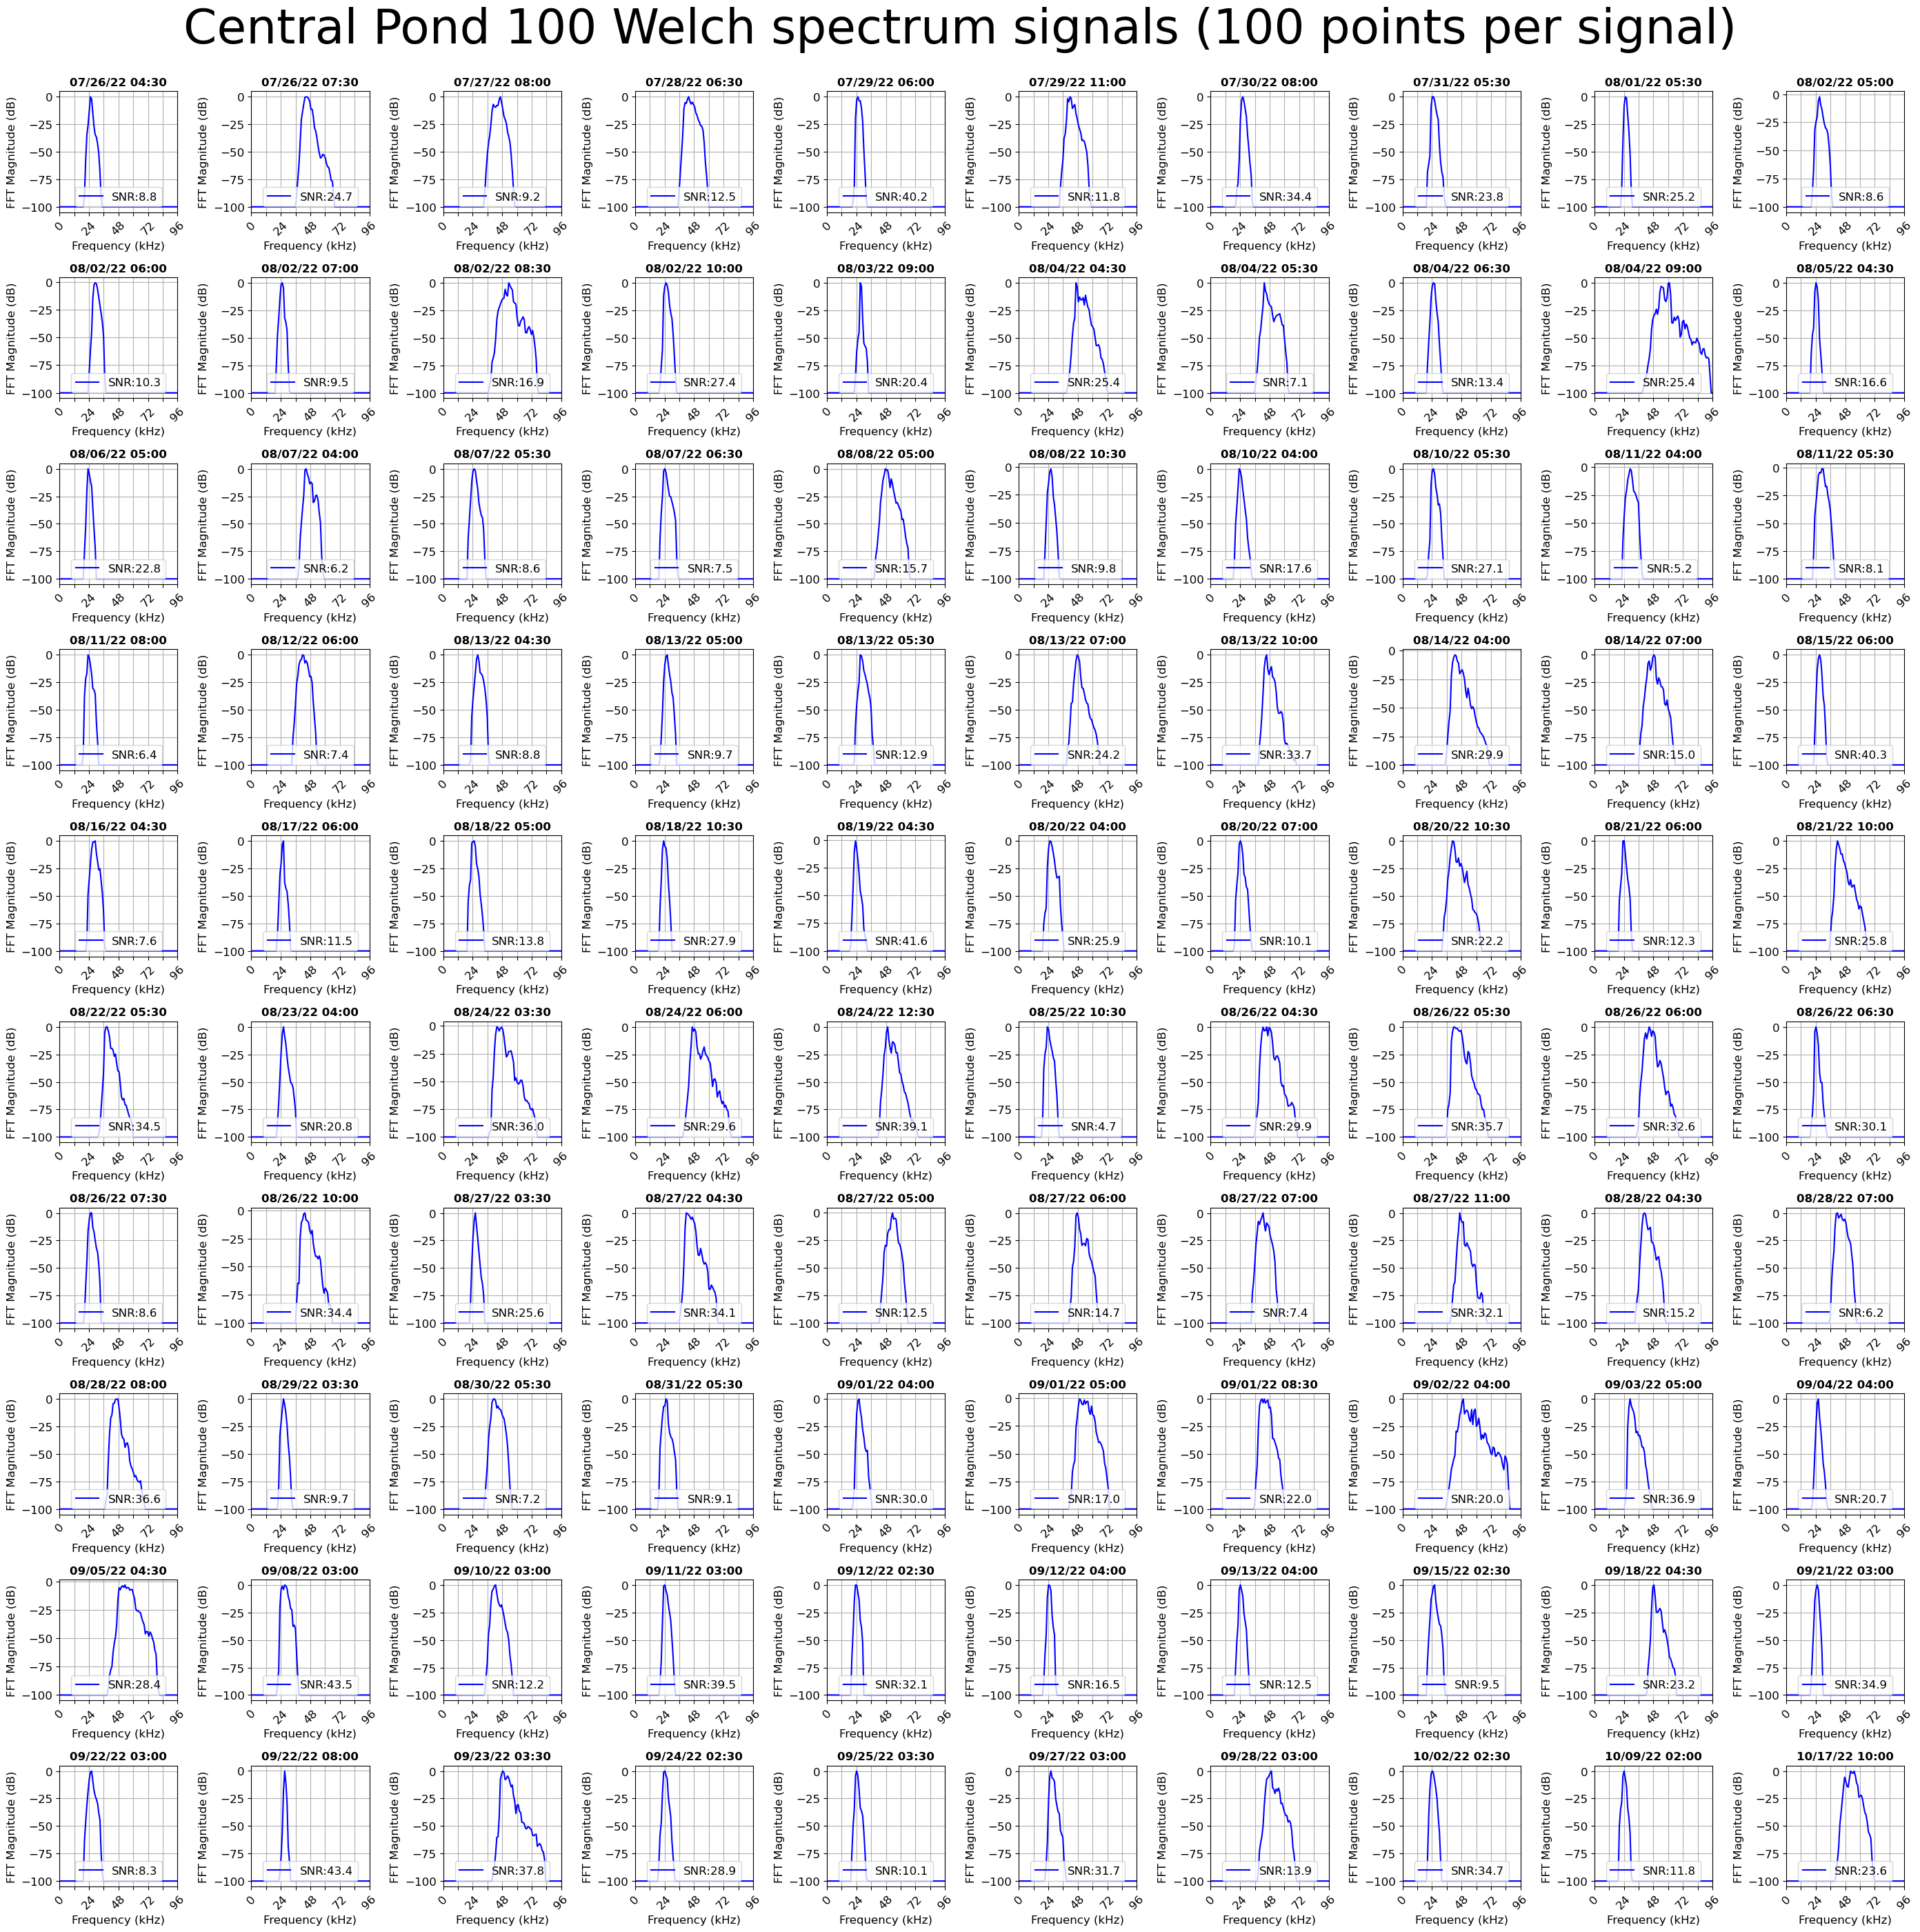

In [7]:
plot_call_features.plot_hundred_welch(good_snr_location_calls_sampled, location_call_signals, site_key)

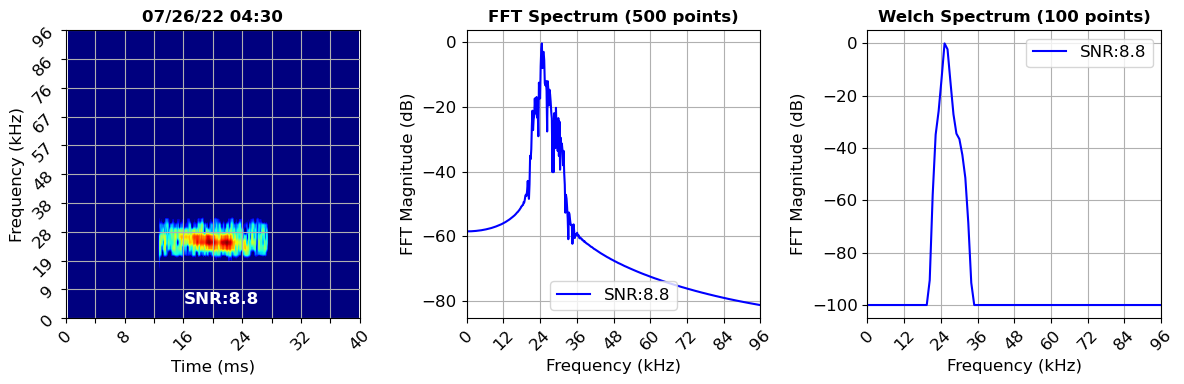

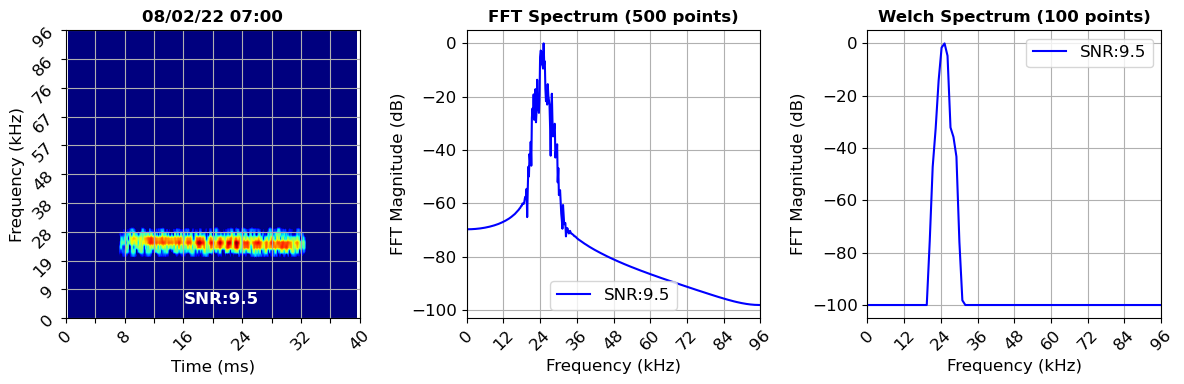

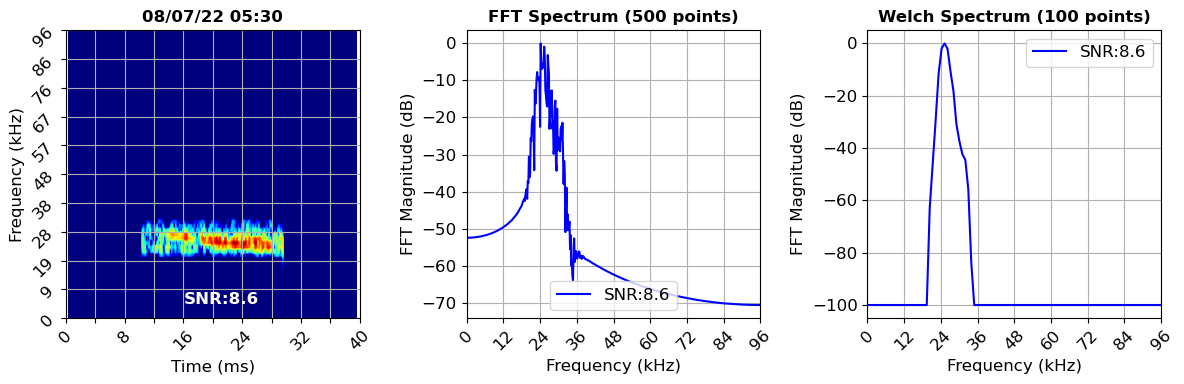

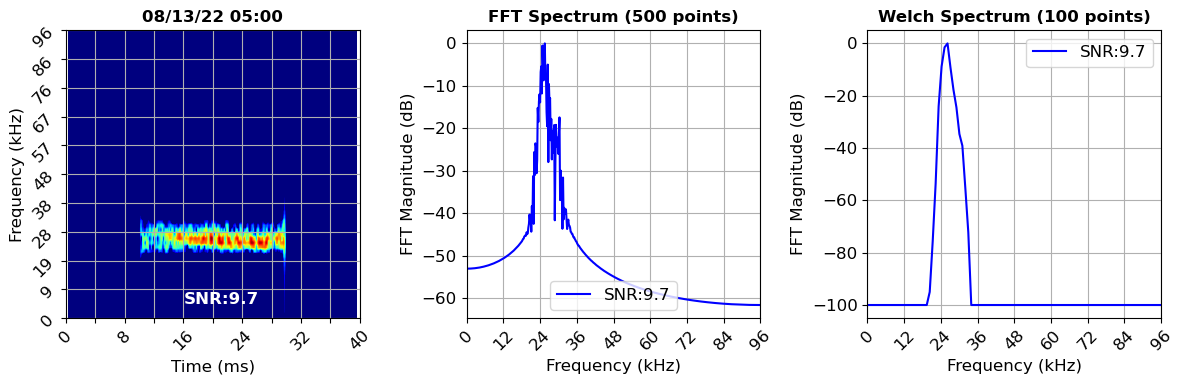

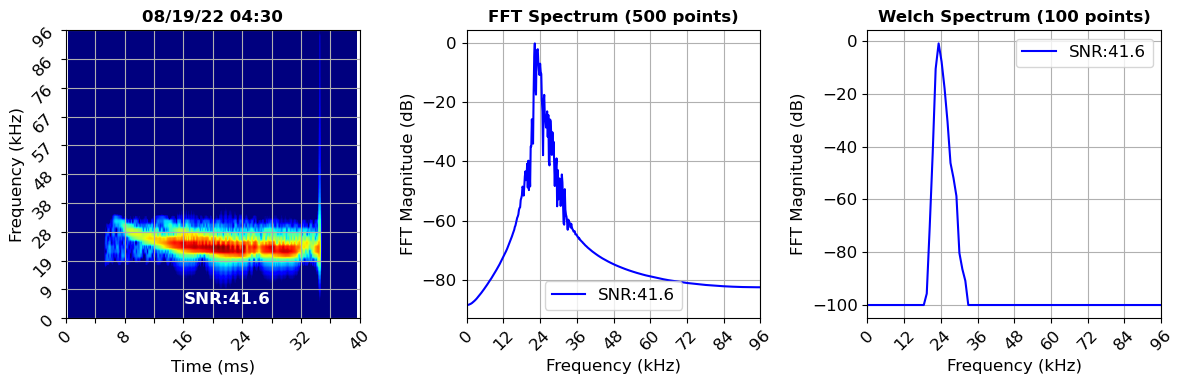

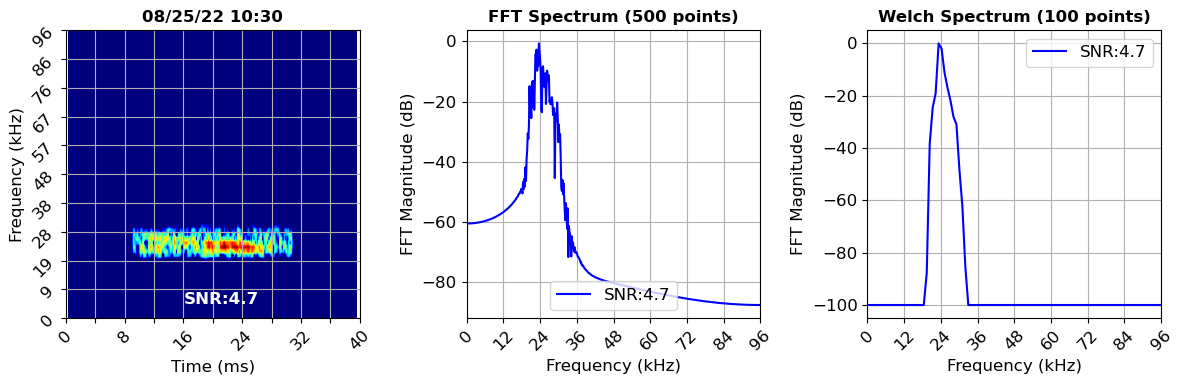

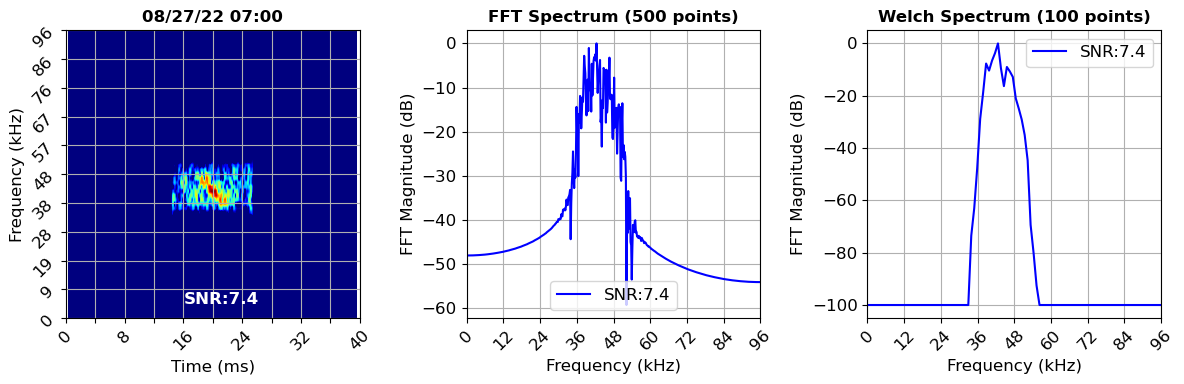

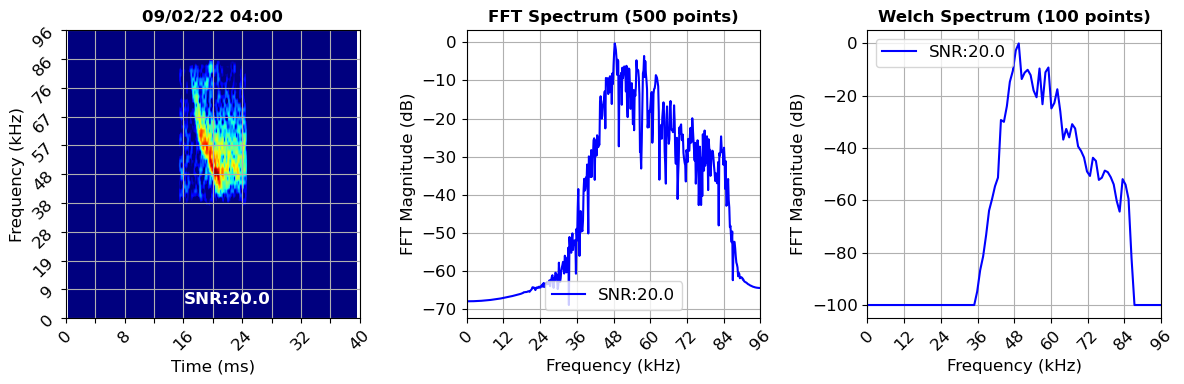

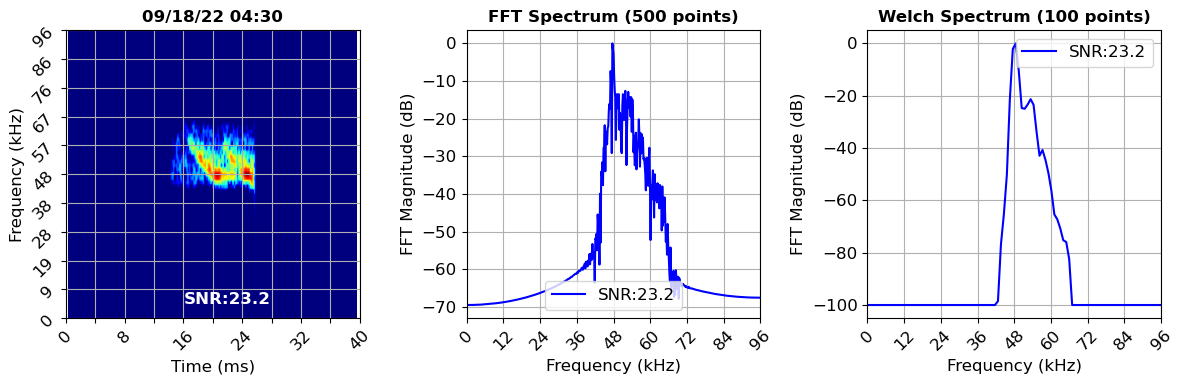

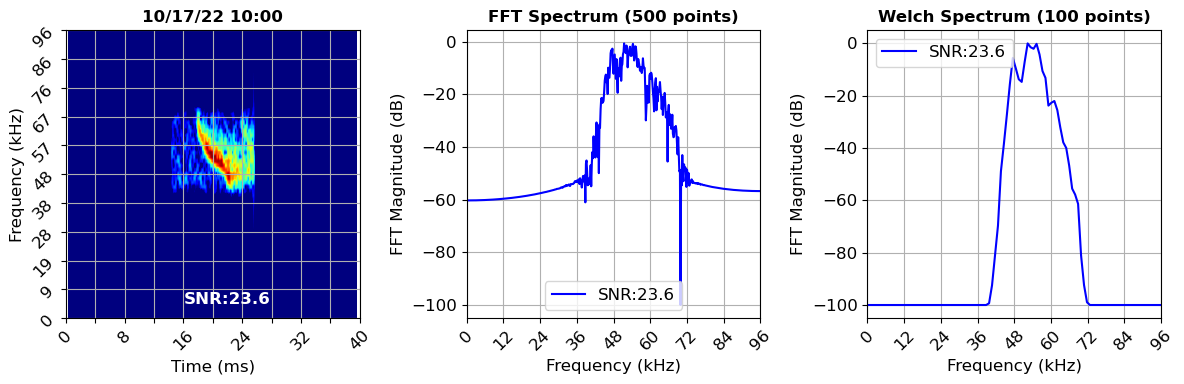

In [8]:
plot_call_features.plot_side_by_side_calls_spectra(good_snr_location_calls_sampled, location_call_signals)

In [9]:
calls_sampled = good_snr_location_calls_sampled.copy()
call_signals = location_call_signals.copy()

In [10]:
fft_signals = compute_features.generate_ffts_for_calls(calls_sampled, call_signals)

In [11]:
welch_signals = compute_features.generate_welchs_for_calls(calls_sampled, call_signals)

In [47]:
welch_signals.shape

w_sig = welch_signals[15]

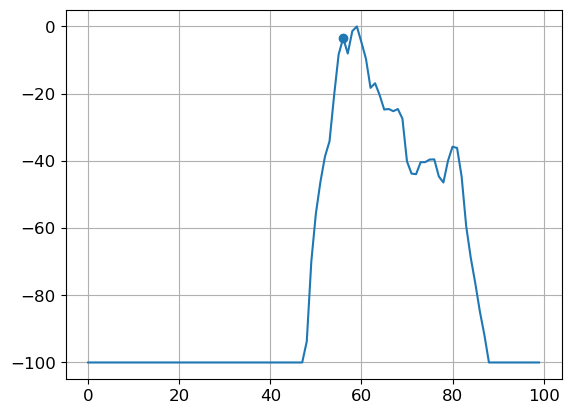

In [48]:
peak_x = scipy.signal.find_peaks(w_sig)[0][0]
peak_y = w_sig[peak_x]

plt.plot(w_sig)
plt.scatter(x=peak_x, y=peak_y)
plt.grid(which='both')
plt.show()